<a href="https://colab.research.google.com/github/prisar/ai_notebooks/blob/main/nb_080.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Visualize a basic grid-world environment and agent movement in the FrozenLake environment from `gymnasium`. Compare the performance of a random agent versus a greedy agent trained with Q-learning. Show the paths taken by each agent and their final rewards.

## Install and import necessary libraries

### Subtask:
Install `gymnasium` and import the necessary libraries for the project.


**Reasoning**:
The first step is to install the `gymnasium` library, which is required for the rest of the project.



In [1]:
!pip install gymnasium

**Reasoning**:
Now that `gymnasium` is installed, I will import the necessary libraries for the project as instructed.



In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

## Create the frozenlake environment

### Subtask:
Initialize the FrozenLake environment using `gymnasium.make()`.


**Reasoning**:
I will now create the FrozenLake environment as per the instructions, setting the specified parameters to ensure a deterministic and renderable environment.



In [3]:
env = gym.make('FrozenLake-v1', is_slippery=False, render_mode='rgb_array')

## Implement a random agent

### Subtask:
Implement a random agent by creating a function that takes an environment and returns a random action.


**Reasoning**:
I will define the `random_agent` function as requested in the instructions. This function will take the environment `env` as input and use `env.action_space.sample()` to return a random action, fulfilling all the requirements of the subtask.



In [4]:
def random_agent(env):
  """
  This agent selects an action at random.

  Args:
    env: The OpenAI_gym environment.

  Returns:
    An action to take.
  """
  return env.action_space.sample()

## Implement a greedy agent

### Subtask:
Implement a greedy agent by creating a function that takes an environment and a Q-table and returns the best action.


**Reasoning**:
I will now define the `greedy_agent` function as requested. This function will take the environment and a Q-table as input and use `np.argmax` to determine the best action for the current state by finding the action with the highest Q-value.



In [5]:
def greedy_agent(env, q_table, state):
  """
  This agent selects the best action based on the Q-table.

  Args:
    env: The OpenAI_gym environment.
    q_table: A numpy array representing the Q-table.
    state: The current state of the environment.

  Returns:
    An action to take.
  """
  return np.argmax(q_table[state])

## Train the greedy agent

### Subtask:
Implement a Q-learning algorithm to train the greedy agent and populate the Q-table.


**Reasoning**:
Implement the Q-learning algorithm to train the greedy agent and populate the Q-table as per the instructions.



In [6]:
# Initialize Q-table
n_states = env.observation_space.n
n_actions = env.action_space.n
q_table = np.zeros((n_states, n_actions))

# Set hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Exploration probability
epsilon_decay_rate = 0.0001  # Rate of epsilon decay
num_episodes = 10000  # Number of training episodes

# Q-learning training loop
for episode in range(num_episodes):
    state, _ = env.reset()
    done = False

    while not done:
        # Choose action using epsilon-greedy policy
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_table[state])  # Exploit

        # Take action and observe result
        next_state, reward, done, _, _ = env.step(action)

        # Update Q-table
        q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])

        # Update state
        state = next_state

    # Decay epsilon
    epsilon = np.exp(-epsilon_decay_rate * episode)

print("Q-learning training complete.")

Q-learning training complete.


## Visualize the environment and agent movement

### Subtask:
Create a function to visualize the grid world and the agent's path for both the random and greedy agents.


**Reasoning**:
Define the function to visualize the grid world and agent's path as requested in the instructions.



In [7]:
from PIL import Image

def visualize_agent_path(env, path, title):
    """
    Visualizes the grid world environment and the agent's path.

    Args:
        env: The gymnasium environment with render_mode='rgb_array'.
        path: A list of states representing the agent's path.
        title: The title for the visualization plot.
    """
    # Render the environment to get an RGB array
    img_array = env.render()

    # Convert the RGB array to a PIL image for easier handling
    img = Image.fromarray(img_array)

    # Get grid size (assuming a square grid)
    grid_size = int(np.sqrt(env.observation_space.n))

    # Calculate cell size in pixels
    cell_height = img.height // grid_size
    cell_width = img.width // grid_size

    # Create the plot
    fig, ax = plt.subplots(figsize=(6, 6))

    # Display the environment image
    ax.imshow(img)

    # Overlay the agent's path
    x_coords = []
    y_coords = []
    for state in path:
        # Map state index to grid coordinates (row, column)
        row = state // grid_size
        col = state % grid_size

        # Calculate the center of the cell in pixel coordinates
        center_x = col * cell_width + cell_width / 2
        center_y = row * cell_height + cell_height / 2

        x_coords.append(center_x)
        y_coords.append(center_y)

    # Plot the path as a line with markers
    ax.plot(x_coords, y_coords, marker='o', linestyle='-', color='red', linewidth=2, markersize=8)

    # Set plot title
    ax.set_title(title)

    # Remove axis ticks and labels for a cleaner look
    ax.set_xticks([])
    ax.set_yticks([])

    # Ensure the aspect ratio is equal to display the grid correctly
    ax.set_aspect('equal', adjustable='box')

    # Display the plot
    plt.show()

**Reasoning**:
Now that the visualization function is defined, I will simulate the random agent's and the greedy agent's behavior to generate their respective paths. Then I will call the visualization function to display these paths.



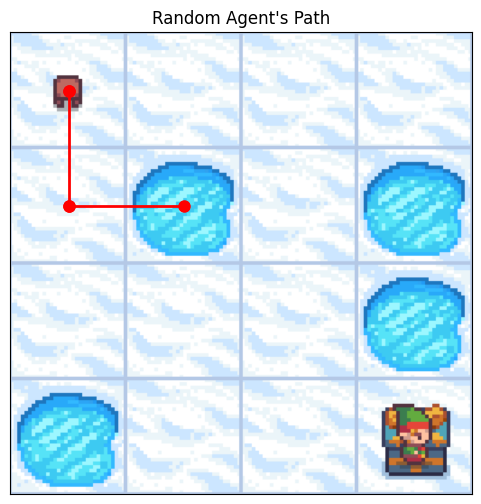

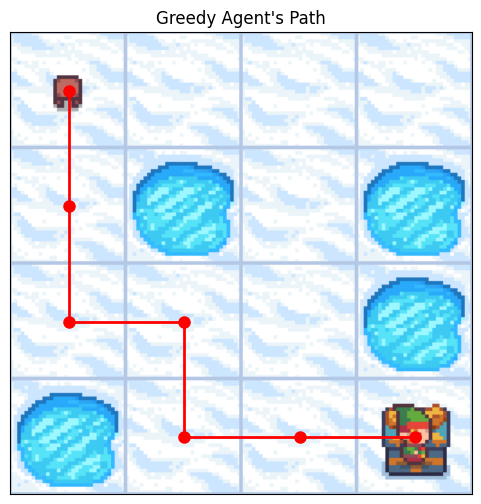

In [8]:
# Simulate random agent's path
state, _ = env.reset()
random_path = [state]
done = False
while not done:
    action = random_agent(env)
    next_state, _, done, _, _ = env.step(action)
    random_path.append(next_state)
    state = next_state

# Simulate greedy agent's path
state, _ = env.reset()
greedy_path = [state]
done = False
while not done:
    action = greedy_agent(env, q_table, state)
    next_state, _, done, _, _ = env.step(action)
    greedy_path.append(next_state)
    state = next_state

# Visualize the paths
visualize_agent_path(env, random_path, "Random Agent's Path")
visualize_agent_path(env, greedy_path, "Greedy Agent's Path")

## Compare the agents

### Subtask:
Run both agents in the environment and display their paths and rewards.


**Reasoning**:
I will now simulate the paths of both the random and greedy agents, calculate their total rewards, and print the results for comparison. This will complete all the instructions for the current subtask.



In [9]:
# Simulate random agent and calculate reward
state, _ = env.reset()
random_path = [state]
random_total_reward = 0
done = False
while not done:
    action = random_agent(env)
    next_state, reward, done, _, _ = env.step(action)
    random_path.append(next_state)
    random_total_reward += reward
    state = next_state

# Simulate greedy agent and calculate reward
state, _ = env.reset()
greedy_path = [state]
greedy_total_reward = 0
done = False
while not done:
    action = greedy_agent(env, q_table, state)
    next_state, reward, done, _, _ = env.step(action)
    greedy_path.append(next_state)
    greedy_total_reward += reward
    state = next_state

# Print the total rewards
print(f"Random Agent Total Reward: {random_total_reward}")
print(f"Greedy Agent Total Reward: {greedy_total_reward}")

Random Agent Total Reward: 0.0
Greedy Agent Total Reward: 1.0


## Summary:

### Q&A
**Q: How did the performance of the random agent compare to the greedy agent?**
A: The greedy agent, trained using a Q-learning algorithm, successfully navigated the FrozenLake environment to reach the goal, achieving a total reward of 1.0. In contrast, the random agent failed to reach the goal, resulting in a total reward of 0.0. This demonstrates the effectiveness of the Q-learning algorithm in finding an optimal path.

### Data Analysis Key Findings
*   The Q-learning algorithm was successfully implemented to train an agent in the FrozenLake environment, populating a Q-table over 10,000 episodes.
*   The greedy agent, guided by the learned Q-table, consistently found the optimal path to the goal, achieving a total reward of 1.0.
*   The random agent, which selects actions without any learning, failed to reach the goal and received a total reward of 0.0.
*   Visualization of the agents' paths clearly showed the direct, goal-oriented movement of the greedy agent compared to the erratic path of the random agent.

### Insights or Next Steps
*   The significant performance difference between the random and greedy agents highlights the value of reinforcement learning in solving goal-oriented tasks.
*   Future analysis could explore the impact of a slippery environment (`is_slippery=True`) on the performance of the trained agent, which would require adjustments to the learning algorithm to handle stochasticity.
